## Logistic Regression: Model Fitting, AIC/BIC, Confusion Matrices, and Backward Variable Selection

In this practical session, we will explore the key concepts and techniques involved in logistic regression modeling, a fundamental method for binary classification problems. Logistic regression allows us to model the relationship between a binary outcome and one or more explanatory variables, making it widely applicable in fields such as healthcare, finance, and social sciences.

This TP will guide you through the following key tasks:

1. **Model Fitting**: We'll begin by fitting a logistic regression model, using real-world data to examine how age impacts the likelihood of cardiovascular disease. This will involve using Python's `statsmodels` library for statistical modeling.
  
2. **AIC/BIC Evaluation**: To ensure our model is well-suited to the data, we will evaluate it using two important model selection criteria—Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC). These measures help balance model complexity and goodness of fit.

3. **Confusion Matrices**: We will generate and interpret confusion matrices, which provide a clear understanding of the model's performance by comparing predicted and actual outcomes.

4. **Backward Variable Selection**: Finally, we will implement backward selection for feature selection. This technique iteratively removes variables to find an optimal model with the best balance between accuracy and simplicity, based on AIC/BIC.

By the end of this Lab, you will gain practical experience with logistic regression, understand the importance of model selection criteria, and learn to interpret model performance metrics to guide decision-making in binary classification tasks.


## I. Logistic Regression: Model Fitting, AIC/BIC, Confusion Matrices, and Backward Variable Selection

### Importing Python Modules

Import the following modules: pandas (as pd), numpy (as np), matplotlib.pyplot (as plt), and statsmodels.formula.api (as smf).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [ ]:
artere = pd.read_csv("artere.txt",delimiter=' ')
artere.head()

,age,agrp,chd
1.0,20,1,0
2.0,23,1,0
3.0,24,1,0
4.0,25,1,0
5.0,25,1,1


### Logistic Regression

Perform a logistic regression with age as the explanatory variable and `chd` as the binary response variable. Store the result in the `modele` object. Steps:



In [ ]:
modele = smf.logit('chd ~ age', data=artere).fit()

Optimization terminated successfully.
         Current function value: 0.536765
         Iterations 6


### Confusion Matrix
Display and plot the estimated confusion matrix for the sample data using a threshold of 0.5.

The first method is


Confusion Matrix:
[[45 12]
 [14 29]]


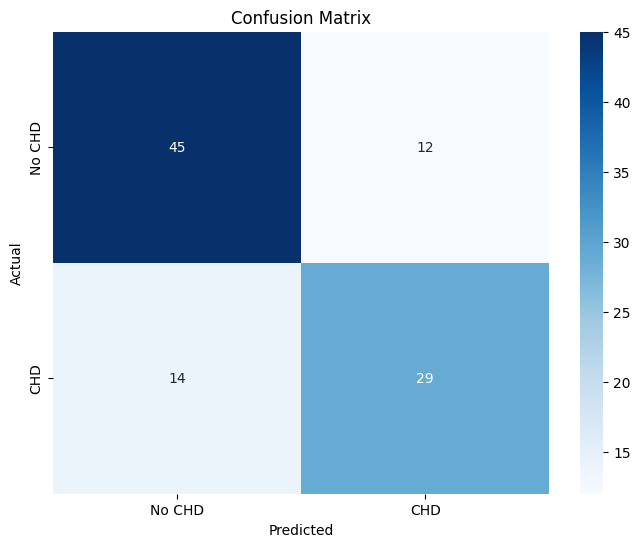

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


yhat = modele.predict() > 0.5
cm = confusion_matrix(artere['chd'], yhat)

print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Question:** Can we use direct method can be used (only for fitted confusion matrix) ?

### Residuals

Graphically represent the deviance residuals:

1. Age on the x-axis and deviance residuals on the y-axis (using the ``resid_dev`` attribute of the model).


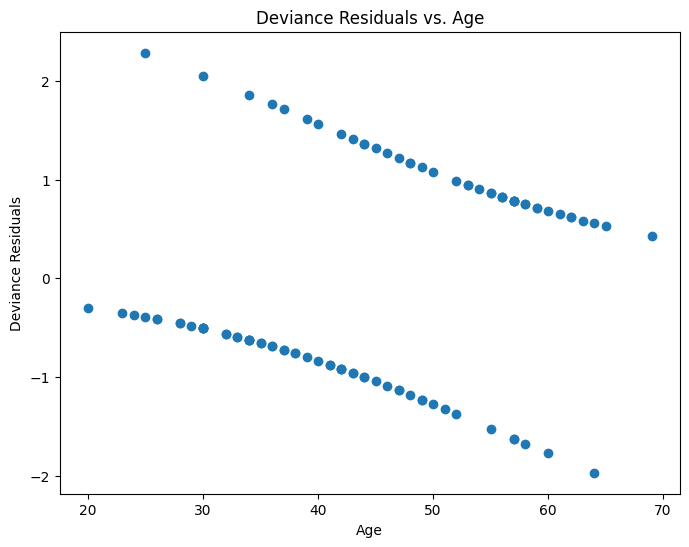

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(artere['age'], modele.resid_dev)
plt.xlabel('Age')
plt.ylabel('Deviance Residuals')
plt.title('Deviance Residuals vs. Age')
plt.show()

**Question:** What does it indicate when we observe the usual shape of residuals versus $\hat{p}$ (or age), and why might this kind of graphic not be commonly used?


#### interpret


2. Make a random permutation on row index and use it on the x-axis and use the residuals on the y-axis (using ``plt.plot``, ``predict`` method on the fitted model, and ``np.arange`` to generate row numbers using the ``shape`` attribute of the DataFrame ; create an instance of the default random generator using ``np.random.default_rng`` and use ``rng.permutation``
on row index).

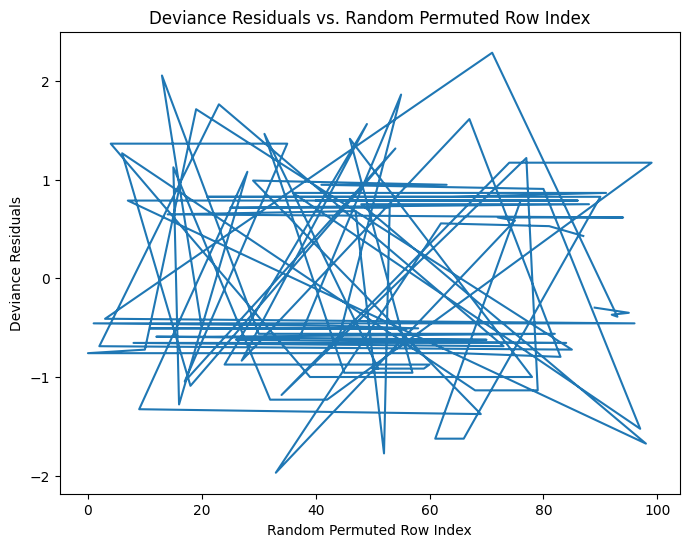

In [ ]:
rng = np.random.default_rng()
row_indices = rng.permutation(artere.shape[0])

# Plot the residuals against the randomly permuted row indices
plt.figure(figsize=(8, 6))
plt.plot(row_indices, modele.resid_dev)
plt.xlabel('Random Permuted Row Index')
plt.ylabel('Deviance Residuals')
plt.title('Deviance Residuals vs. Random Permuted Row Index')
plt.show()

**Question**: What does it mean when we say that no observation has an absolute value of residual really high, and how does this impact our confidence in the model's predictions?

#### interpret

## Variable selection

### 1. Read data
As usually data in Fun Campus are inside directory. We rename all variable as ``X0, X1, ..., X57`` and ``Y``

In [ ]:
spam = pd.read_csv("spambase.data", header=None,  sep=",")
column_names = [f"X{i}" for i in range(57)] + ["Y"]
spam.columns = column_names

print(spam.head())

     X0    X1    X2   X3    X4    X5    X6    X7    X8    X9  ...   X48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

     X49  X50    X51    X52    X53    X54  X55   X56  Y  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278  1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028  1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259  1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191  1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191  1  

[5 rows x 58 columns]


### 2. Backward Selection

We simply replace `ols` with `logit` in the code for variable selection (Part 1.7).

**The function starts with the full model:**

- We separate the response variable (object `response`) from the explanatory variables.
- These explanatory variables are transformed into a set (object `start_explanatory`).
- The lower set is the empty set (object `lower_explanatory`).
- The potential variables to be removed are obtained as the difference (object `remove`).
- We initialize the set of selected variables (object `selected`) and create the first formula using all selected variables, adding the intercept at the end.

Using `smf.logit`, we compute the AIC or BIC for the starting model (stored as `current_score`).

**The while loop begins:**

- For each variable (in the `for` loop) to be removed, we perform a regression with the current set of variables minus the candidate variable.
- We construct a list of triplets containing the score (AIC/BIC), sign (always "-"), and the candidate variable to be removed from the model.

At the end of the `for` loop, we sort the list of triplets based on the score. If the best triplet has a better score than `current_score`, we update `remove`, `selected`, and `current_score`. If not, we exit the while loop.

**Final Step:**

At the end, we fit the current model and return it.


**Question** Complete the ``logitbackward`` function:

1. **Criterion Check (TODO)**:  
   Add a validation step to ensure that the `crit` parameter is either `"aic"` or `"bic"`.  
   - **Question**: Why is it important to validate the criterion before proceeding?

2. **Loop Implementation (TODO)**:  
   Implement the logic inside the loop that tests removing each candidate variable and calculates the AIC/BIC score.  
   - **Question**: Why do we test each variable by removing it and recalculating the score?

3. **Score Update (TODO)**:  
   Implement the step to sort the candidate scores and update the model if the score improves.  
   - **Question**: What is the reason for choosing the variable that leads to the greatest score improvement?


#### Réponses:
1) It is important to validate the criterion because the rest of the code assumes it is either aic or bic, so a check at the beginning is necessary to avoid errors.

2)

In [ ]:
def logitbackward(data, start, crit="aic", verbose=False):
    """Backward selection for linear model with smf (with formula).

    Parameters:
    -----------
    data (pandas DataFrame): DataFrame with all possible predictors
            and response
    start (string): a string giving the starting model
            (i.e., the starting point)
    crit (string): "aic"/"AIC" or "bic"/"BIC"
    verbose (boolean): if True, print progress verbosely

    Returns:
    --------
    model: An "optimal" linear model fitted with statsmodels
           with an intercept and
           selected by forward/backward selection based on the criterion.
    """

    # criterion
    if crit not in ["aic", "AIC", "bic", "BIC"]:
        raise ValueError("Criterion must be 'aic', 'AIC', 'bic', or 'BIC'.")

    # Question 1: Why do we need to validate the criterion type?

    # starting point
    formula_start = start.split("~")
    response = formula_start[0].strip()

    # explanatory variables for the 3 models
    start_explanatory = set([item.strip() for item in
                             formula_start[1].split("+")]) - set(['1'])

    # setting up the set "remove" which contains the possible variables to remove
    lower_explanatory = set([])
    remove = start_explanatory - lower_explanatory

    # current point
    selected = start_explanatory
    formula = "{} ~ {} + 1".format(response, ' + '.join(list(selected)))

    if crit == "aic" or crit == "AIC":
        current_score = smf.logit(formula, data).fit().aic
    elif crit == "bic" or crit == "BIC":
        current_score = smf.logit(formula, data).fit().bic
    if verbose:
        print("----------------------------------------------")
        print((current_score, "Starting", selected))

    # main loop
    while True:
        scores_with_candidates = []

        ### TODO: Implement the loop to test each candidate variable by removing it and calculating AIC/BIC.
        # Question 2: Why do we calculate the score for each possible variable removal?

        for candidate in remove:
            tobetested = selected - set([candidate])
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(list(tobetested)))
            if crit == "aic" or crit == "AIC":
                score = smf.logit(formula, data).fit().aic
            elif crit == "bic" or crit == "BIC":
                score = smf.logit(formula, data).fit().bic
            if verbose:
                print((score, "-", candidate))
            scores_with_candidates.append((score, candidate))

        ### TODO: Sort the candidate scores and update the model if the score improves.
        # Question 3: Why do we choose the variable with the best score reduction?

        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop(0)
        if current_score > best_new_score:
            remove = remove - set([best_candidate])
            selected = selected - set([best_candidate])
            current_score = best_new_score
            if verbose:
                print("----------------------------------------------")
                print((current_score, "New Current", selected))
        else:
            break

    if verbose:
        print("----------------------------------------------")
        print((current_score, "Final", selected))

    # Final model fitting
    formula = "{} ~ {} + 1".format(response, ' + '.join(list(selected)))
    model = smf.logit(formula, data).fit()

    return model


In [ ]:
var = "Y~X0+X1+X2+X3+X4+X5+X6+X7+X8+X9+X10+X11+X12+X13+X14+X15+X16+X17+X18+X19+X20+X21+X22+X23+X24+X25+X26+X27+X28+X29+X30+X31+X32+X33+X34+X35+X36+X37+X38+X39+X40+X41+X42+X43+X44+X45+X46+X47+X48+X49+X50+X51+X52+X53+X54+X55+X56"

In [ ]:
modelefinal = logitbackward(spam, var, crit="aic", verbose=True)

Optimization terminated successfully.
         Current function value: 0.197323
         Iterations 15
----------------------------------------------
(1931.7654774989578, 'Starting', {'X9', 'X29', 'X44', 'X39', 'X40', 'X6', 'X51', 'X4', 'X50', 'X31', 'X3', 'X16', 'X19', 'X32', 'X48', 'X56', 'X5', 'X42', 'X41', 'X36', 'X23', 'X45', 'X38', 'X37', 'X24', 'X7', 'X22', 'X46', 'X34', 'X11', 'X12', 'X21', 'X30', 'X49', 'X35', 'X10', 'X18', 'X1', 'X27', 'X52', 'X26', 'X54', 'X28', 'X0', 'X8', 'X47', 'X33', 'X55', 'X2', 'X43', 'X17', 'X20', 'X53', 'X13', 'X15', 'X14', 'X25'})
Optimization terminated successfully.
         Current function value: 0.197684
         Iterations 15
(1933.0904161293422, '-', 'X9')
Optimization terminated successfully.
         Current function value: 0.197457
         Iterations 15
(1931.003904621131, '-', 'X29')
Optimization terminated successfully.
         Current function value: 0.202568
         Iterations 16
(1978.0271603255364, '-', 'X44')
Optimization termina

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.197715
         Iterations 15
(1933.3727616301828, '-', 'X14')
Optimization terminated successfully.
         Current function value: 0.198213
         Iterations 15
(1937.9581000224944, '-', 'X25')
----------------------------------------------
(1929.8351001472463, 'New Current', {'X9', 'X29', 'X44', 'X39', 'X40', 'X6', 'X51', 'X4', 'X50', 'X31', 'X3', 'X16', 'X19', 'X32', 'X48', 'X56', 'X5', 'X42', 'X41', 'X23', 'X45', 'X38', 'X37', 'X24', 'X7', 'X22', 'X46', 'X34', 'X11', 'X12', 'X21', 'X30', 'X49', 'X35', 'X10', 'X18', 'X1', 'X27', 'X52', 'X26', 'X54', 'X28', 'X0', 'X8', 'X47', 'X33', 'X55', 'X2', 'X43', 'X17', 'X20', 'X53', 'X13', 'X15', 'X14', 'X25'})
Optimization terminated successfully.
         Current function value: 0.197690
         Iterations 15
(1931.1449613454806, '-', 'X9')
Optimization terminated successfully.
         Current function value: 0.197464
         Iterations 15
(1929.0659923720527, '-

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.197723
         Iterations 15
(1931.4490458466678, '-', 'X14')
Optimization terminated successfully.
         Current function value: 0.198216
         Iterations 15
(1935.980868175821, '-', 'X25')
----------------------------------------------
(1927.963969441125, 'New Current', {'X9', 'X29', 'X44', 'X39', 'X40', 'X6', 'X51', 'X4', 'X50', 'X31', 'X3', 'X16', 'X19', 'X32', 'X48', 'X56', 'X5', 'X42', 'X41', 'X23', 'X45', 'X38', 'X37', 'X24', 'X7', 'X22', 'X46', 'X34', 'X11', 'X21', 'X30', 'X49', 'X35', 'X10', 'X18', 'X1', 'X27', 'X52', 'X26', 'X54', 'X28', 'X0', 'X8', 'X47', 'X33', 'X55', 'X2', 'X43', 'X17', 'X20', 'X53', 'X13', 'X15', 'X14', 'X25'})
Optimization terminated successfully.
         Current function value: 0.197708
         Iterations 15
(1929.3108737676666, '-', 'X9')
Optimization terminated successfully.
         Current function value: 0.197476
         Iterations 15
(1927.1735500157652, '-', 'X29')

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.197726
         Iterations 15
(1929.4756412220652, '-', 'X14')
Optimization terminated successfully.
         Current function value: 0.198224
         Iterations 15
(1934.0538060396593, '-', 'X25')
----------------------------------------------
(1926.1551872433492, 'New Current', {'X9', 'X29', 'X44', 'X39', 'X40', 'X6', 'X51', 'X4', 'X50', 'X31', 'X3', 'X16', 'X19', 'X32', 'X48', 'X56', 'X5', 'X42', 'X41', 'X23', 'X45', 'X38', 'X37', 'X24', 'X7', 'X22', 'X46', 'X34', 'X11', 'X21', 'X30', 'X49', 'X35', 'X10', 'X18', 'X1', 'X27', 'X52', 'X26', 'X54', 'X28', 'X0', 'X8', 'X47', 'X55', 'X2', 'X43', 'X17', 'X20', 'X53', 'X13', 'X15', 'X14', 'X25'})
Optimization terminated successfully.
         Current function value: 0.197733
         Iterations 15
(1927.5402552381086, '-', 'X9')
Optimization terminated successfully.
         Current function value: 0.197497
         Iterations 15
(1925.3649726467743, '-', 'X29')
Opti

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.197746
         Iterations 15
(1927.661743324017, '-', 'X14')
Optimization terminated successfully.
         Current function value: 0.198244
         Iterations 15
(1932.2372534148203, '-', 'X25')
----------------------------------------------
(1924.4056155735884, 'New Current', {'X9', 'X29', 'X44', 'X39', 'X40', 'X6', 'X51', 'X4', 'X50', 'X31', 'X3', 'X16', 'X19', 'X32', 'X48', 'X56', 'X5', 'X42', 'X41', 'X23', 'X45', 'X38', 'X37', 'X24', 'X7', 'X22', 'X46', 'X34', 'X11', 'X21', 'X49', 'X35', 'X10', 'X18', 'X1', 'X27', 'X52', 'X26', 'X54', 'X28', 'X0', 'X8', 'X47', 'X55', 'X2', 'X43', 'X17', 'X20', 'X53', 'X13', 'X15', 'X14', 'X25'})
Optimization terminated successfully.
         Current function value: 0.197760
         Iterations 15
(1925.790907914764, '-', 'X9')
Optimization terminated successfully.
         Current function value: 0.197523
         Iterations 15
(1923.6101748744852, '-', 'X29')
Optimization 

And the final/selected model:

In [ ]:
print(modelefinal.summary())

                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                 4601
Model:                          Logit   Df Residuals:                     4557
Method:                           MLE   Df Model:                           43
Date:                Wed, 30 Oct 2024   Pseudo R-squ.:                  0.7042
Time:                        00:04:44   Log-Likelihood:                -912.44
converged:                       True   LL-Null:                       -3085.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5519      0.128    -12.144      0.000      -1.802      -1.301
X9             0.1161      0.070      1.659      0.097      -0.021       0.253
X44           -0.7956      0.155     -5.147      0.0

# Implementation of Trend Analysis Methods from the Paper: "Trend Analysis of Climate Time Series: A Review of Methods" by Manfred Mudelsee.
The objective is to implement some parts of the following paper:
https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwjOofS_7IKCAxWqQ6QEHaP5AGUQFnoECBAQAQ&url=https%3A%2F%2Fwww.sciencedirect.com%2Fscience%2Farticle%2Fpii%2FS0012825218303726&usg=AOvVaw2h7ng9VdpiNWU8mlG0MgRO&opi=89978449


#### Read the file global_temperature.txt.

In [3]:
global_temp = pd.read_csv("global_temperature.txt", delimiter=',')
global_temp.head()

,Year,Temp
0,1880,-0.17
1,1881,-0.09
2,1882,-0.11
3,1883,-0.18
4,1884,-0.29


### II.A Simple Linear Regression and Boostrap Algorithm

Perform the regression of the slope and intercept


In [4]:
formula = 'Temp ~ Year'
model = smf.ols(formula, global_temp).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     464.4
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           1.87e-46
Time:                        18:10:56   Log-Likelihood:                 43.879
No. Observations:                 143   AIC:                            -83.76
Df Residuals:                     141   BIC:                            -77.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.2096      0.709    -21.459      0.0

Plot the residuals as a function of time


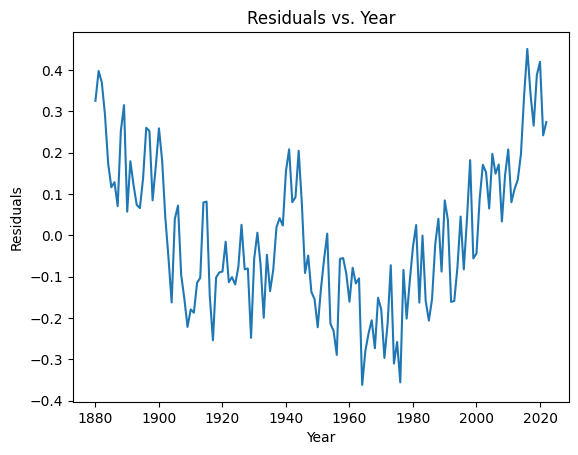

In [5]:
plt.plot(global_temp['Year'], model.resid)
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.title('Residuals vs. Year')
plt.show()

Plot the histogram of the residuals. What usual assumptions of least squares regression seem to be contradicted by this figure?


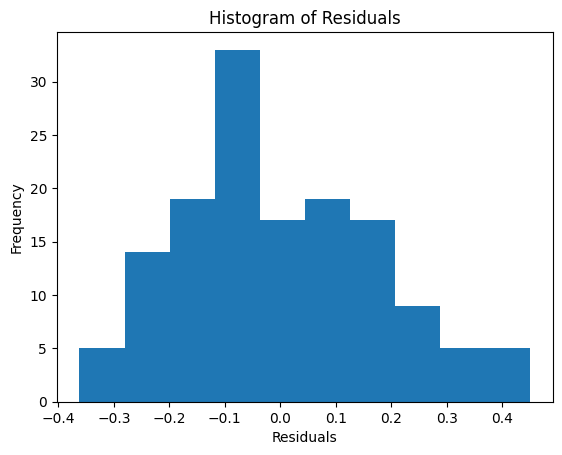

In [6]:
plt.hist(model.resid)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

### Comment:
The histrogram shows that the assumptions:
$$ E({\epsilon}) = 0 $$
and
Error's Gaussianity
are violated

Plot the residuals against the past residual. What usual assumptions of least squares regression seem to be contradicted by this figure?


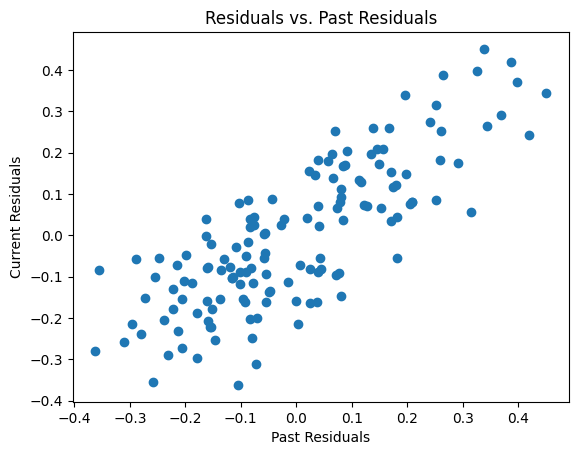

In [7]:
plt.scatter(model.resid[:-1], model.resid[1:])
plt.xlabel('Past Residuals')
plt.ylabel('Current Residuals')
plt.title('Residuals vs. Past Residuals')
plt.show()

### Comment:
The plot show that the assumpution of independent errors is violated
It shows a positive correlation between consecutive years residuals, meaning that the assumption:
$$ Cov({\epsilon}) = σ^{2}\mathbf{I} $$
is violated

#### Article comprehension questions:
* Briefly recall the principle of bootstrap discussed in previous practical sessions, and the purpose of this algorithm.
* In light of the visualizations of the residuals in the previous questions, justify the adaptation of the bootstrap algorithm presented in this paper.

### Comment:
1) The bootstrap is a resampling technique used to estimate the distribution of a statistic/estimator by repeatedly sampling, with replacement, from the observed data. The bootstrap method is used to estimate confidence intervals and standard errors of estimators when certain assumptions like normality of error are not verified.

2) In time series data, residuals are often autocorrelated, meaning that they are not independent from one another. Traditional bootstrap methods assume that residuals are independent and identically distributed (i.i.d.), which does not hold for autocorrelated data. The Moving Block Bootstrap (MBB) presented in the paper addresses this by resampling blocks of consecutive data points rather than individual points, preserving the autocorrelation structure within each block.

#### According to this article, what is the formula for calculating the optimal length to account for autocorrelation? Write the corresponding function.


The optimal block length $ l_{\text{opt}} $ for the Moving Block Bootstrap (MBB) to account for autocorrelation is calculated as:

$$
l_{\text{opt}} = \text{NINT} \left( \left[ \frac{6^{1/2}.{\hat{a}}}{1 - {\hat{a}}^2} \right]^{\frac{2}{3}} \cdot n^{\frac{1}{3}} \right)
$$

where:
- $ \text{NINT} $ denotes rounding to the nearest integer,
- $ {\hat{a}} $ is the autocorrelation coefficient,
- $ n $ is the sample size.


In [8]:
import numpy as np

def optimal_block_length(n, auto_corr):
    term1 = (6 ** 0.5) * auto_corr / (1 - auto_corr ** 2)
    term2 = n ** (1 / 3)
    l_opt = round((term1 ** (2 / 3)) * term2)
    return l_opt


#### Q.12 Implement the bootstrap algorithm presented in the article and calculate the confidence intervals of the regression.


In [9]:
import numpy as np
import statsmodels.api as sm

def mbb_confidence_intervals(x, t, B=2000):
    n = len(x)
    model = sm.OLS(x, sm.add_constant(t)).fit()
    beta_0, beta_1 = model.params
    residuals = x - (beta_0 + beta_1 * t)

    autocorr = np.corrcoef(residuals[:-1], residuals[1:])[0, 1]
    l_opt = optimal_block_length(n, autocorr)

    intercepts, slopes = [], []
    for _ in range(B):
        indices = np.random.choice(range(n - l_opt), n, replace=True)
        resampled_residuals = np.concatenate([residuals[i:i + l_opt] for i in indices])
        x_star = beta_0 + beta_1 * t + resampled_residuals[:n]

        t_with_constant = sm.add_constant(t)
        model_star = sm.OLS(x_star, t_with_constant).fit()

        intercepts.append(model_star.params.iloc[0])
        slopes.append(model_star.params.iloc[1])


    intercept_ci = np.percentile(intercepts, [2.5, 97.5])
    slope_ci = np.percentile(slopes, [2.5, 97.5])
    print("Done")

    intercept_mean = np.mean(intercepts)
    intercept_se = np.std(intercepts, ddof=1) / np.sqrt(B)

    slope_mean = np.mean(slopes)
    slope_se = np.std(slopes, ddof=1) / np.sqrt(B)


    # CI + mean et ecart-type pour comparer avec les valeurs dans l'article:
    print("Intercept Mean:", intercept_mean)
    print("Intercept Standard Error:", intercept_se)
    print("Intercept 95% Confidence Interval:", intercept_ci)
    print("Slope Mean:", slope_mean)
    print("Slope Standard Error:", slope_se)
    print("Slope 95% Confidence Interval:", slope_ci)

    return intercept_ci, slope_ci

    #return {"intercept_ci": intercept_ci, "slope_ci": slope_ci}


In [10]:
x = global_temp['Temp']
t = global_temp['Year']

print(mbb_confidence_intervals(x, t, B=2000))

Done
Intercept Mean: -15.308799296351701
Intercept Standard Error: 0.04059918774653255
Intercept 95% Confidence Interval: [-18.67622679 -11.72195164]
Slope Mean: 0.007860484920616797
Slope Standard Error: 2.0809865117433525e-05
Slope 95% Confidence Interval: [0.00602212 0.0096052 ]
(array([-18.67622679, -11.72195164]), array([0.00602212, 0.0096052 ]))


#### Comment:

Results are close to the paper's estimates:
$$ \hat{\beta}_0 \pm \text{se}(\hat{\beta}_0) = -14.0^\circ \text{C} \pm 1.6^\circ \text{C} $$
$$ \hat{\beta}_1 \pm \text{se}(\hat{\beta}_1) = 0.0072^\circ \text{C/a} \pm 0.0008^\circ \text{C/a} $$




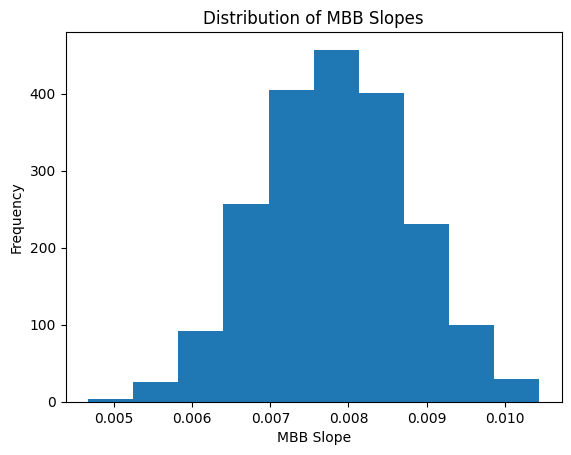

In [82]:
# prompt: distribution of mbb slopes

def mbb_slopes_distribution(x, t, B=2000):
    """
    Calculates the distribution of MBB slopes for a given dataset.

    Args:
        x: The dependent variable (e.g., temperature).
        t: The independent variable (e.g., year).
        B: The number of bootstrap iterations.

    Returns:
        A list of estimated slopes from the bootstrap iterations.
    """

    n = len(x)
    model = sm.OLS(x, sm.add_constant(t)).fit()
    beta_0, beta_1 = model.params
    residuals = x - (beta_0 + beta_1 * t)

    autocorr = np.corrcoef(residuals[:-1], residuals[1:])[0, 1]
    l_opt = optimal_block_length(n, autocorr)

    slopes = []
    for _ in range(B):
        indices = np.random.choice(range(n - l_opt), n, replace=True)
        resampled_residuals = np.concatenate([residuals[i:i + l_opt] for i in indices])
        x_star = beta_0 + beta_1 * t + resampled_residuals[:n]

        t_with_constant = sm.add_constant(t)
        model_star = sm.OLS(x_star, t_with_constant).fit()

        slopes.append(model_star.params.iloc[1])

    return slopes


x = global_temp['Temp']
t = global_temp['Year']

slopes_distribution = mbb_slopes_distribution(x, t, B=2000)

# You can now analyze the distribution of slopes (e.g., plot a histogram)
plt.hist(slopes_distribution)
plt.xlabel('MBB Slope')
plt.ylabel('Frequency')
plt.title('Distribution of MBB Slopes')
plt.show()

## II.B Break Regression

#### Q.1 We assume that we are trying to find the parameters of 2 lines connected at a time $t$. Justify that this problem reduces to a simple regression problem with 3 parameters, and implement a function that takes as arguments $X$ and $k$ (where $k$ is the index of time $t$ in the matrix $X$) and returns the matrix of explanatory variables.


To justify why finding the parameters of two lines connected at a time $ t $ reduces to a simple regression problem with three parameters, consider the following:

1. **Model Setup**: We aim to model a time series with two linear segments connected at a change-point $ t $. This setup implies that:
   - Before $ t $, the data follows one linear model.
   - After $ t $, the data follows another linear model.

2. **Parameters**:
   - Let $ \beta_0 $ be the intercept of the first line.
   - Let $ \beta_1 $ be the slope of the first line (applicable before $ t $).
   - Let $ \beta_2 $ be the slope of the second line (applicable after $ t $).

3. **Formulation**:
   - We can express the values before and after $ t $ with a single formula:
$     X(i) = \beta_0 + \beta_1 \cdot t(i) + \beta_2 \cdot (t(i) - t) \cdot I(t(i) > t)
$   where $ I(t(i) > t) $ is an indicator function equal to 1 if $ t(i) > t $ and 0 otherwise.
   - This formulation reduces to a simple regression with three parameters: $ \beta_0 $, $ \beta


In [11]:
import numpy as np

def explanatory_matrix(X, k):
    n = len(X)
    intercept = np.ones(n)

    time = X
    slope_change = np.where(X > X[k], X - X[k], 0)

    explanatory_matrix = np.column_stack((intercept, time, slope_change))
    return explanatory_matrix


#### Q.2 Plot the model for $t = 1950$.


In [12]:
T = global_temp['Year']
X = global_temp['Temp']
print(T[:5])
print(X[:5])

0    1880
1    1881
2    1882
3    1883
4    1884
Name: Year, dtype: int64
0   -0.17
1   -0.09
2   -0.11
3   -0.18
4   -0.29
Name: Temp, dtype: float64


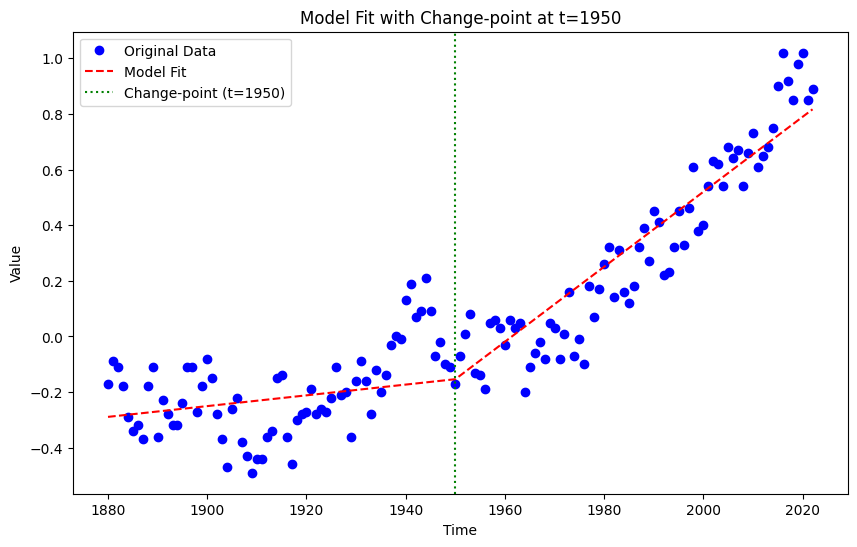

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

t = 1950
k = np.where(T >= t)[0][0]

# Create explanatory matrix
X_matrix = explanatory_matrix(T, k)

# Fit the regression model
model = sm.OLS(X, X_matrix).fit()
predicted_values = model.predict(X_matrix)

# Plot the data and the model
plt.figure(figsize=(10, 6))
plt.plot(T, X, label="Original Data", color="blue", marker="o", linestyle="None")
plt.plot(T, predicted_values, label="Model Fit", color="red", linestyle="--")
plt.axvline(x=1950, color="green", linestyle=":", label="Change-point (t=1950)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Model Fit with Change-point at t=1950")
plt.legend()
plt.show()


* What metric can be used to assess the quality of the model?

=> For the following, we will use SSR to evaluate and compare the models.

* Suggest a simple algorithm to determine the optimal breakpoint and implement it.


In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression

def optimal_breakpoint(X, Y):

    n = len(X)
    min_ssr = float('inf')
    best_k = 0

    for k in range(1, n - 1):
        X_matrix = explanatory_matrix(X, k)

        model = sm.OLS(Y, X_matrix).fit()
        predictions = model.predict(X_matrix)

        ssr = np.sum((Y - predictions) ** 2)
        if ssr < min_ssr:
            min_ssr = ssr
            best_k = k

    return best_k, T[best_k] , min_ssr

optimal_k,optimal_t, min_ssr = optimal_breakpoint(T, X)
print(f"Optimal breakpoint index: {optimal_k},Optimal t {optimal_t},  Minimum ssr: {min_ssr}")


Optimal breakpoint index: 94,Optimal t 1974,  Minimum ssr: 1.8853457767716306


#### Q.3 Show the scores as a function of $t$.


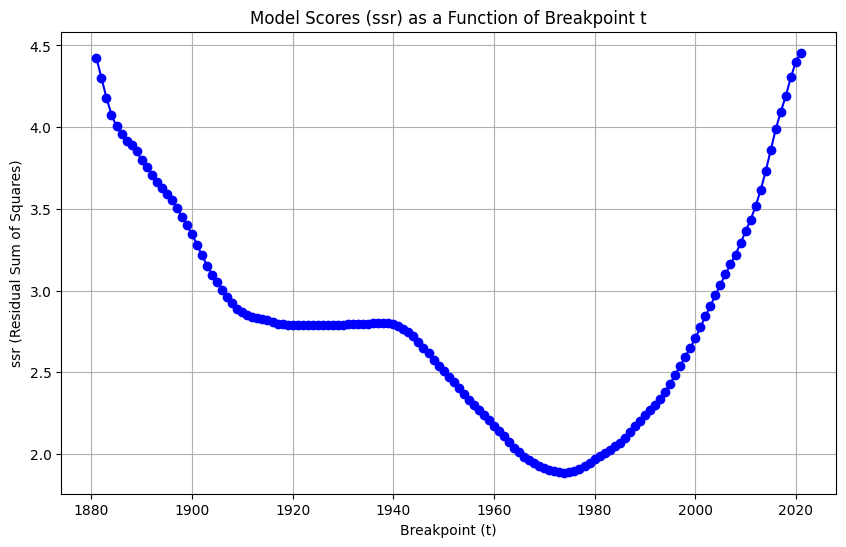

In [15]:
import matplotlib.pyplot as plt

def scores_vs_breakpoints(X, Y):
    n = len(X)
    ssr_scores = []
    breakpoints = []

    for k in range(1, n - 1):
        X_matrix = explanatory_matrix(X, k)

        model = sm.OLS(Y, X_matrix).fit()
        predictions = model.predict(X_matrix)

        ssr = np.sum((Y - predictions) ** 2)
        ssr_scores.append(ssr)
        breakpoints.append(T[k])

    return breakpoints, ssr_scores

breakpoints, ssr_scores = scores_vs_breakpoints(T, X)

plt.figure(figsize=(10, 6))
plt.plot(breakpoints, ssr_scores, marker='o', linestyle='-', color='blue')
plt.xlabel("Breakpoint (t)")
plt.ylabel("ssr (Residual Sum of Squares)")
plt.title("Model Scores (ssr) as a Function of Breakpoint t")
plt.grid(True)
plt.show()

#### Q.4 Plot the optimal ramp predicted.

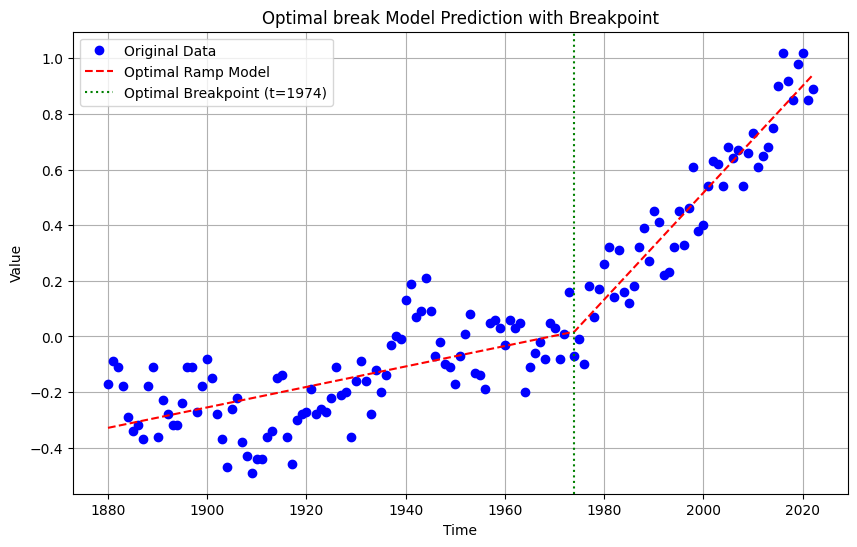

In [16]:
optimal_k, _,_ = optimal_breakpoint(T, X)
X_matrix_optimal = explanatory_matrix(T, optimal_k)

model_optimal = sm.OLS(X, X_matrix_optimal).fit()
predicted_values_optimal = model_optimal.predict(X_matrix_optimal)

plt.figure(figsize=(10, 6))
plt.plot(T, X, label="Original Data", color="blue", marker="o", linestyle="None")
plt.plot(T, predicted_values_optimal, label="Optimal Ramp Model", color="red", linestyle="--")
plt.axvline(x=T[optimal_k], color="green", linestyle=":", label=f"Optimal Breakpoint (t={T[optimal_k]})")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Optimal break Model Prediction with Breakpoint")
plt.legend()
plt.grid(True)
plt.show()


#### Q.5 Plot the residuals (commenet briefly).

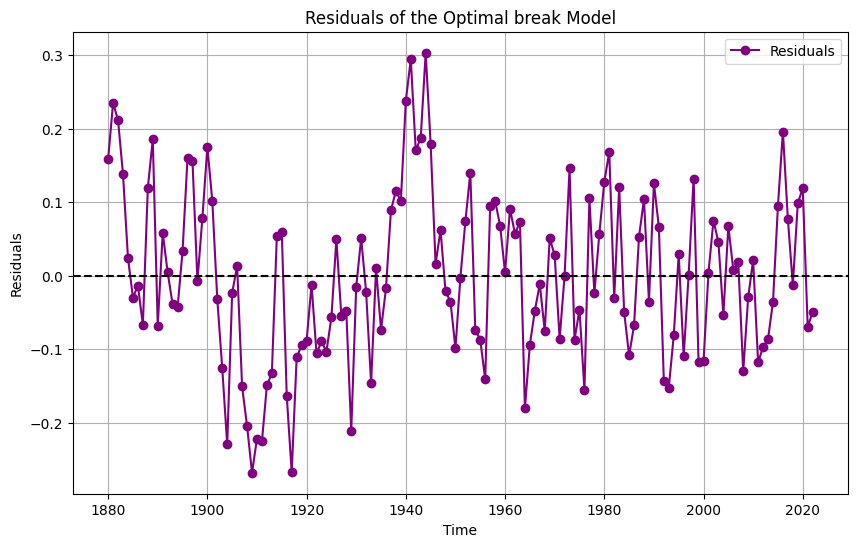

In [17]:
residuals_optimal = X - predicted_values_optimal

plt.figure(figsize=(10, 6))
plt.plot(T, residuals_optimal, label="Residuals", color="purple", marker="o", linestyle="-")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.title("Residuals of the Optimal break Model")
plt.legend()
plt.grid(True)
plt.show()


Commentary
The residuals plot shows the difference between the observed values and the predictions of the optimal ramp model. Ideally, residuals should be randomly scattered around zero without any clear pattern, indicating that the model captures the data well. If there are systematic patterns (e.g., a trend or clustering of residuals above or below zero), it suggests the model may not fully capture all aspects of the data, potentially indicating areas where model improvement could be made.

#### Q.6 What is the optimal length for the boostrap ?

In [18]:
auto_corr_break = np.corrcoef(residuals_optimal[:-1], residuals_optimal[1:])[0, 1]
optimal_block_length(len(residuals_optimal), auto_corr_break)


8

Give the confidence interval for the break and plot the distribution of the confidence interval.

In [25]:
import numpy as np
import statsmodels.api as sm

def bootstrap_breakpoint(X, Y, B=2000):
    n = len(X)
    model = sm.OLS(Y, explanatory_matrix(X, optimal_k)).fit()
    predicted_values = model.predict()
    residuals = Y - predicted_values
    autocorr = np.corrcoef(residuals[:-1], residuals[1:])[0, 1]
    l_opt = optimal_block_length(n, autocorr)

    breakpoints = []
    for i in range(B):
        print(i)
        indices = np.random.choice(range(n - l_opt), n, replace=True)
        resampled_residuals = np.concatenate([residuals[i:i + l_opt] for i in indices])
        x_star = predicted_values + resampled_residuals[:n]
        breakpoint = optimal_breakpoint(X, x_star)[0]
        breakpoints.append(breakpoint)


    break_ci = np.percentile(breakpoints, [2.5, 97.5])

    break_mean = np.mean(breakpoints)
    break_se = np.std(breakpoints, ddof=1) / np.sqrt(B)
    print("Done")


    # CI + mean et ecart-type pour comparer avec les valeurs dans l'article:
    print("Break Mean:", break_mean)
    print("Break Standard Error:", break_se)
    print("Break 95% Confidence Interval:", break_ci)

    return break_ci



In [26]:
bootstrap_breakpoint(T, X, B=2000)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

array([ 82., 104.])

In [29]:
print(T[82],T[104])

1962 1984


Fit the modèle between 1992 and 2013, then between 1992–2023. Comment on the use of the model.

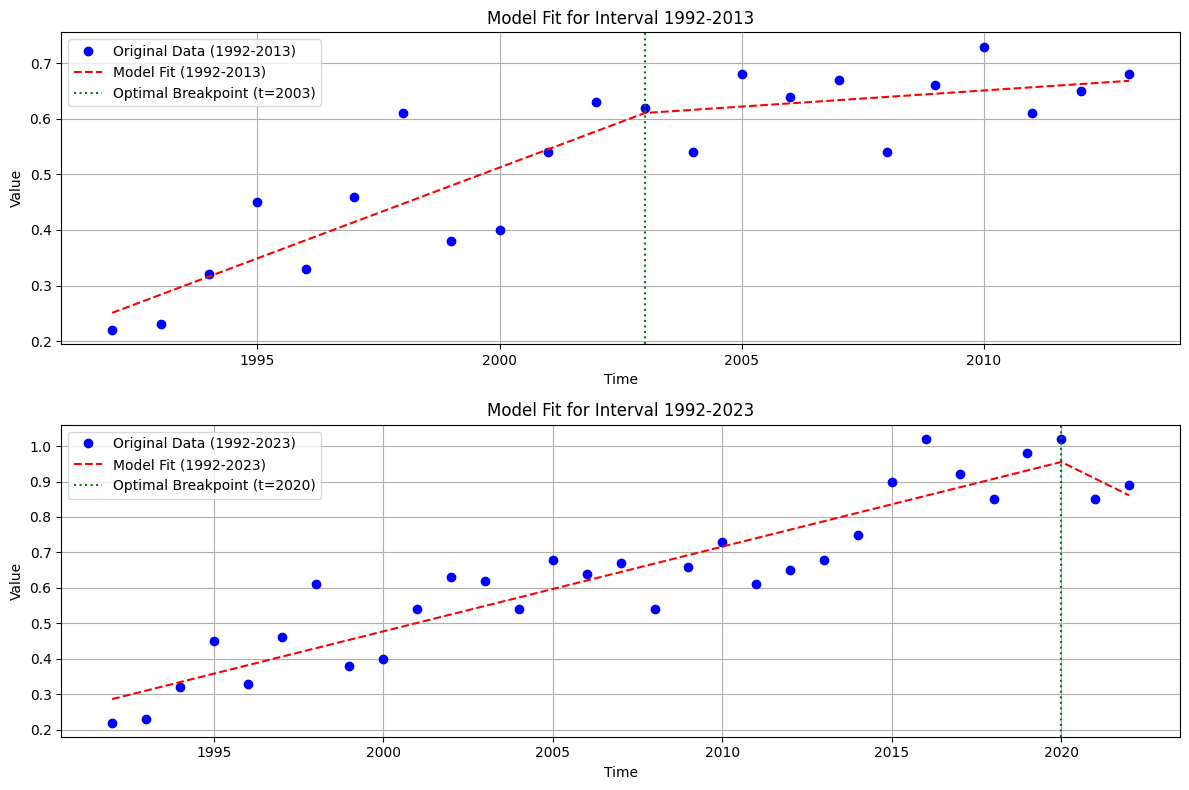

In [40]:
T_1992_2013 = T[T.between(1992, 2013)].reset_index(drop=True)
X_1992_2013 = X[T.between(1992, 2013)].reset_index(drop=True)

T_1992_2023 = T[T.between(1992, 2023)].reset_index(drop=True)
X_1992_2023 = X[T.between(1992, 2023)].reset_index(drop=True)

optimal_k_1992_2013 = optimal_breakpoint(T_1992_2013, X_1992_2013)[0]
X_matrix_1992_2013 = explanatory_matrix(T_1992_2013, optimal_k_1992_2013)
model_1992_2013 = sm.OLS(X_1992_2013, X_matrix_1992_2013).fit()  # Fixed order of arguments
predicted_values_1992_2013 = model_1992_2013.predict(X_matrix_1992_2013)

optimal_k_1992_2023, _,_ = optimal_breakpoint(T_1992_2023, X_1992_2023)
X_matrix_1992_2023 = explanatory_matrix(T_1992_2023, optimal_k_1992_2023)
model_1992_2023 = sm.OLS(X_1992_2023, X_matrix_1992_2023).fit()  # Fixed order of arguments
predicted_values_1992_2023 = model_1992_2023.predict(X_matrix_1992_2023)

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(T_1992_2013, X_1992_2013, label="Original Data (1992-2013)", color="blue", marker="o", linestyle="None")
plt.plot(T_1992_2013, predicted_values_1992_2013, label="Model Fit (1992-2013)", color="red", linestyle="--")

if 0 <= optimal_k_1992_2013 < len(T_1992_2013):  # Check for valid index
    plt.axvline(x=T_1992_2013.iloc[optimal_k_1992_2013], color="green", linestyle=":",
                label=f"Optimal Breakpoint (t={T_1992_2013.iloc[optimal_k_1992_2013]})")

plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Model Fit for Interval 1992-2013")
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(T_1992_2023, X_1992_2023, label="Original Data (1992-2023)", color="blue", marker="o", linestyle="None")
plt.plot(T_1992_2023, predicted_values_1992_2023, label="Model Fit (1992-2023)", color="red", linestyle="--")

if 0 <= optimal_k_1992_2023 < len(T_1992_2023):  # Check for valid index
    plt.axvline(x=T_1992_2023.iloc[optimal_k_1992_2023], color="green", linestyle=":",
                label=f"Optimal Breakpoint (t={T_1992_2023.iloc[optimal_k_1992_2023]})")

plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Model Fit for Interval 1992-2023")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# II.C Ramp Regression

#### Q.1 Implement the ramp regression model.

In [59]:
def explanatory_matrix_ramp(X, k,l):
    n = len(X)
    col1 = np.ones(n)
    col2 = np.where(X > X[k], np.minimum(X, X[l]) - X[k], 0)
    explanatory_matrix = np.column_stack((col1, col2))
    return explanatory_matrix

76 142


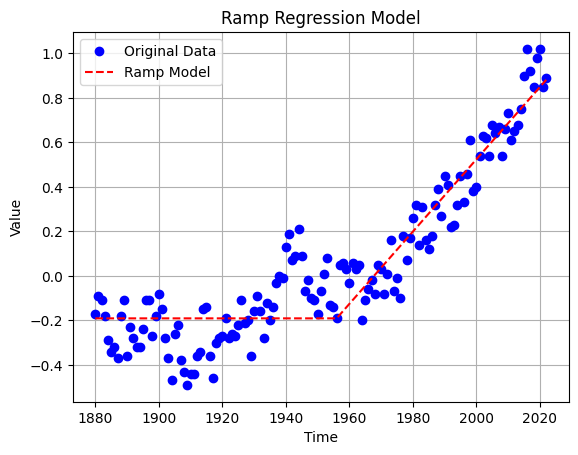

In [64]:
import numpy as np
from sklearn.linear_model import LinearRegression

def ramp_regression_model(X, Y, k,l):

    X_matrix = explanatory_matrix_ramp(X, k,l)

    model = sm.OLS(Y, X_matrix).fit()

    return model, X_matrix


def optimal_k_l(X,Y):
    n = len(X)
    min_ssr = float('inf')
    best_k = 0
    best_l = 0
    for k in range(1, n - 1):
        for l in range(k + 1, n):
            X_matrix = explanatory_matrix_ramp(X, k,l)
            model = sm.OLS(Y, X_matrix).fit()
            ssr = np.sum((Y-model.predict(X_matrix))**2)
            if ssr < min_ssr:
                min_ssr = ssr
                best_k = k
                best_l = l
    return best_k, best_l



# Test
k,l = optimal_k_l(T,X)
print(k,l)
model, X_matrix = ramp_regression_model(T, X, k,l)

predicted_values = model.predict(X_matrix)

plt.plot(T, X, label="Original Data", color="blue", marker="o", linestyle="None")
plt.plot(T, predicted_values, label="Ramp Model", color="red", linestyle="--")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Ramp Regression Model")
plt.legend()
plt.grid(True)
plt.show()


#### Q.2 Fit the model between 1880, 1975. Give the confidence interval for the jump between the two "plateau". Comment briefly.

<ipython-input-66-522ae7361449>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  jump_estimate = model_1880_1975.params[1] * (T[l] - T[k])


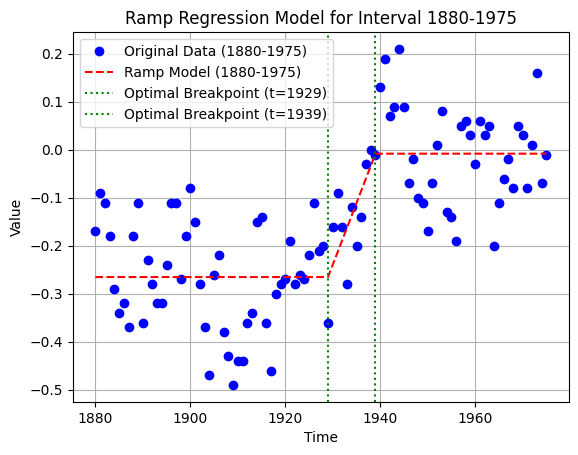

In [66]:
from enum import auto
T_1880_1975 = T[(T >= 1880) & (T <= 1975)].reset_index(drop=True)
X_1880_1975 = X[(T >= 1880) & (T <= 1975)].reset_index(drop=True)

opt_k,opt_l= optimal_k_l(T_1880_1975,X_1880_1975)
model_1880_1975, X_matrix_1880_1975 = ramp_regression_model(T_1880_1975, X_1880_1975, opt_k,opt_l)

jump_estimate = model_1880_1975.params[1] * (T[l] - T[k])

plt.plot(T_1880_1975, X_1880_1975, label="Original Data (1880-1975)", color="blue", marker="o", linestyle="None")
plt.plot(T_1880_1975, model_1880_1975.predict(), label="Ramp Model (1880-1975)", color="red", linestyle="--")
plt.axvline(x=T[opt_k], color="green", linestyle=":", label=f"Optimal Breakpoint (t={T[opt_k]})")
plt.axvline(x=T[opt_l], color="green", linestyle=":", label=f"Optimal Breakpoint (t={T[opt_l]})")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Ramp Regression Model for Interval 1880-1975")
plt.legend()
plt.grid(True)
plt.show()



In [76]:
print(model_1880_1975.params[1] * (T[l] - T[k]))

1.696523355599401


<ipython-input-76-a675473f06dd>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(model_1880_1975.params[1] * (T[l] - T[k]))


In [78]:
def bootstrap_ramp(X, Y, B=2000):
    n = len(X)
    k,l = optimal_k_l(X,Y)
    model, X_matrix = ramp_regression_model(X, Y, k,l)
    predicted_values = model.predict()
    residuals = Y - predicted_values
    autocorr = np.corrcoef(residuals[:-1], residuals[1:])[0, 1]
    l_opt = optimal_block_length(n, autocorr)

    jumps = []
    for i in range(B):
        indices = np.random.choice(range(n - l_opt), n, replace=True)
        resampled_residuals = np.concatenate([residuals[i:i + l_opt] for i in indices])
        x_star = predicted_values + resampled_residuals[:n]
        model2 = sm.OLS(x_star,explanatory_matrix_ramp(X, k,l)).fit()
        jump_estimate = model2.params[1] * (X[l] - X[k])
        jumps.append(jump_estimate)


    jump_ci = np.percentile(jumps, [2.5, 97.5])

    jump_mean = np.mean(jumps)
    jump_se = np.std(jumps, ddof=1) / np.sqrt(B)
    print("Done")


    # CI + mean et ecart-type pour comparer avec les valeurs dans l'article:
    print("jump Mean:", jump_mean)
    print("jump Standard Error:", jump_se)
    print("jump 95% Confidence Interval:", jump_ci)

    return jump_ci

print(bootstrap_ramp(T_1880_1975, X_1880_1975, B=2000))

Done
jump Mean: 0.25622301457224544
jump Standard Error: 0.0006878686619088093
jump 95% Confidence Interval: [0.19598982 0.31532114]
[0.19598982 0.31532114]


## II.D NonParametric Regression

#### Q.1 Implement the non-parametric regression and display both the fitted line and it's confidence intervale as in figure 9 and figure 11 (of the paper)

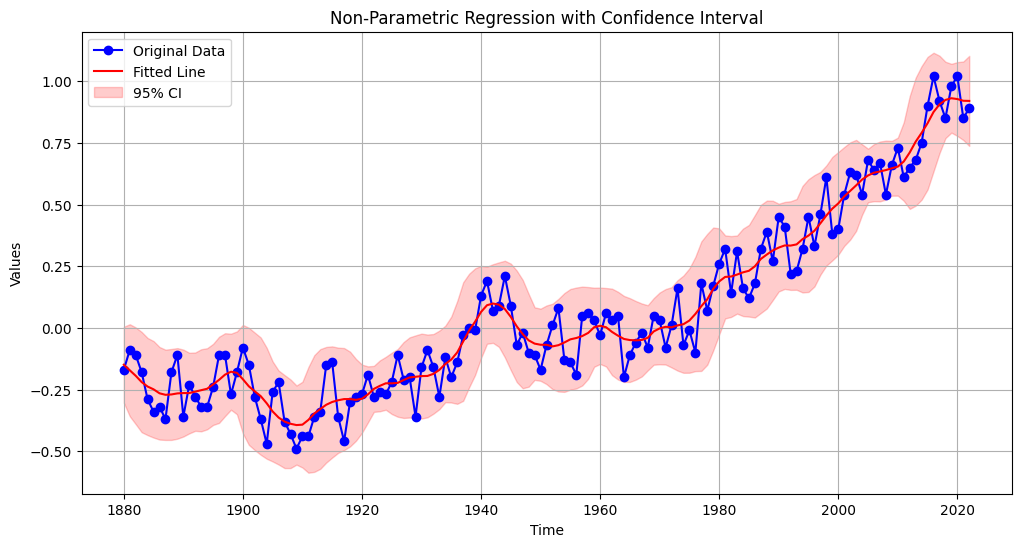

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def epanechnikov_kernel(u):
    return 0.75 * (1 - u**2) * (np.abs(u) <= 1)

def non_parametric_regression(X, Y, bandwidth=5):

    n = len(X)
    fitted_values = np.zeros(n)
    se_band = np.zeros(n)

    for i, T in enumerate(X):
        weights = epanechnikov_kernel((T - X) / bandwidth) / bandwidth
        weights_sum = np.sum(weights)
        fitted_values[i] = np.sum(weights * Y) / weights_sum
        se_band[i] = np.sqrt(np.sum((Y - fitted_values[i])**2 * weights) / weights_sum**2)

    return fitted_values, se_band

time_series = T
values = X

fitted_values, se_band = non_parametric_regression(time_series, values, bandwidth=5)

plt.figure(figsize=(12, 6))
plt.plot(time_series, values, label="Original Data", color="blue", marker="o", linestyle="-")
plt.plot(time_series, fitted_values, label="Fitted Line", color="red")
plt.fill_between(time_series, fitted_values - 2 * se_band, fitted_values + 2 * se_band, color="red", alpha=0.2, label="95% CI")
plt.xlabel("Time")
plt.ylabel("Values")
plt.title("Non-Parametric Regression with Confidence Interval")
plt.legend()
plt.grid(True)
plt.show()
